# Football Analysis

##  Introduction

Football, being one of the most beloved and globally celebrated sports, is not just a game of passion but also a domain rich with data that encapsulates the performance and potential of individual players. This dataset presents a comprehensive collection of information about football players, encompassing diverse attributes such as age, nationality, overall and potential ratings, club affiliations, market value, and wages. In this context, leveraging data analysis and modeling techniques becomes imperative for extracting meaningful insights that can inform decisions related to player recruitment, contract negotiations, and team strategy.

## Objectives

### Main Objective

To predict future player performance based on the current players relevant attributes

### Other Objectives 

- Club Comparison 
- Rating players based on current attributes
- Goal Keepers Analysis
- To draw meaningful insights from the dataset


In [1]:
# Importing necessary libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

import seaborn as sns 
from sklearn.model_selection import train_test_split #for splitting our data into training and testing sets

from sklearn.linear_model import LinearRegression # for creating and training datasets
from sklearn.metrics import mean_squared_error, r2_score #Evaluate model performance

import statsmodels.api as sm 
import warnings

warnings.filterwarnings("ignore")

### Loading the Dataset

In [2]:
df = pd.read_csv("fifa.csv")
df

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,England,47,65,Crewe Alexandra,€60K,€1K,1307,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,143000.0
18203,243165,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,€60K,€1K,1098,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,113000.0
18204,241638,B. Worman,16,England,47,67,Cambridge United,€60K,€1K,1189,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,165000.0
18205,246268,D. Walker-Rice,17,England,47,66,Tranmere Rovers,€60K,€1K,1228,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,143000.0


In [3]:
df.columns
df.shape

(18207, 84)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 84 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  int64  
 5   Potential                 18207 non-null  int64  
 6   Club                      17966 non-null  object 
 7   Value                     18207 non-null  object 
 8   Wage                      18207 non-null  object 
 9   Special                   18207 non-null  int64  
 10  Preferred Foot            18159 non-null  object 
 11  International Reputation  18159 non-null  float64
 12  Weak Foot                 18159 non-null  float64
 13  Skill Moves               18159 non-null  float64
 14  Work R

### Data cleaning

In [5]:
df['Club'].value_counts()

Chelsea              33
Atlético Madrid      33
Manchester City      33
Borussia Dortmund    33
Cardiff City         33
                     ..
Grêmio               20
Botafogo             20
Sligo Rovers         19
Limerick FC          19
Derry City           18
Name: Club, Length: 651, dtype: int64

In [6]:
# dropping irrelevant columns
columns_to_drop = ['LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM',
'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB','RCB', 'RB','Joined','Contract Valid Until','Release Clause','Jersey Number']

df.drop(columns=columns_to_drop,axis=1,inplace=True)

In [7]:
#Checking for missing values
# Creating function to check missing values and duplicates
def check_values(data):
    missing_values = data.isnull().sum().T
    return missing_values

check_values(df)

ID                            0
Name                          0
Age                           0
Nationality                   0
Overall                       0
Potential                     0
Club                        241
Value                         0
Wage                          0
Special                       0
Preferred Foot               48
International Reputation     48
Weak Foot                    48
Skill Moves                  48
Work Rate                    48
Body Type                    48
Real Face                    48
Position                     60
Height                       48
Weight                       48
Crossing                     48
Finishing                    48
HeadingAccuracy              48
ShortPassing                 48
Volleys                      48
Dribbling                    48
Curve                        48
FKAccuracy                   48
LongPassing                  48
BallControl                  48
Acceleration                 48
SprintSp

In [8]:
min_values = 48
df.dropna(thresh=min_values,inplace=True)

In [9]:
check_values(df)

ID                            0
Name                          0
Age                           0
Nationality                   0
Overall                       0
Potential                     0
Club                        241
Value                         0
Wage                          0
Special                       0
Preferred Foot                0
International Reputation      0
Weak Foot                     0
Skill Moves                   0
Work Rate                     0
Body Type                     0
Real Face                     0
Position                     12
Height                        0
Weight                        0
Crossing                      0
Finishing                     0
HeadingAccuracy               0
ShortPassing                  0
Volleys                       0
Dribbling                     0
Curve                         0
FKAccuracy                    0
LongPassing                   0
BallControl                   0
Acceleration                  0
SprintSp

In [10]:
df['Position'].value_counts().head(30)

ST     2152
GK     2025
CB     1778
CM     1394
LB     1322
RB     1291
RM     1124
LM     1095
CAM     958
CDM     948
RCB     662
LCB     648
LCM     395
RCM     391
LW      381
RW      370
RDM     248
LDM     243
LS      207
RS      203
RWB      87
LWB      78
CF       74
LAM      21
RAM      21
RF       16
LF       15
Name: Position, dtype: int64

In [11]:
def handling_missing_values(data):
    mode_club = data['Club'].mode()[0]  # Calculate mode and access the first value
    mode_position = data['Position'].mode()[0]  # Calculate mode and access the first value
    data['Club'] = data['Club'].fillna(mode_club)
    data['Position'] = data['Position'].fillna(mode_position)
    return data

df = handling_missing_values(df)
print(df.isnull().sum())


ID                          0
Name                        0
Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Value                       0
Wage                        0
Special                     0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Work Rate                   0
Body Type                   0
Real Face                   0
Position                    0
Height                      0
Weight                      0
Crossing                    0
Finishing                   0
HeadingAccuracy             0
ShortPassing                0
Volleys                     0
Dribbling                   0
Curve                       0
FKAccuracy                  0
LongPassing                 0
BallControl                 0
Acceleration                0
SprintSpeed                 0
Agility                     0
Reactions 

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18159 entries, 0 to 18206
Data columns (total 54 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18159 non-null  int64  
 1   Name                      18159 non-null  object 
 2   Age                       18159 non-null  int64  
 3   Nationality               18159 non-null  object 
 4   Overall                   18159 non-null  int64  
 5   Potential                 18159 non-null  int64  
 6   Club                      18159 non-null  object 
 7   Value                     18159 non-null  object 
 8   Wage                      18159 non-null  object 
 9   Special                   18159 non-null  int64  
 10  Preferred Foot            18159 non-null  object 
 11  International Reputation  18159 non-null  float64
 12  Weak Foot                 18159 non-null  float64
 13  Skill Moves               18159 non-null  float64
 14  Work R

In [13]:
check_values(df)

ID                          0
Name                        0
Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Value                       0
Wage                        0
Special                     0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Work Rate                   0
Body Type                   0
Real Face                   0
Position                    0
Height                      0
Weight                      0
Crossing                    0
Finishing                   0
HeadingAccuracy             0
ShortPassing                0
Volleys                     0
Dribbling                   0
Curve                       0
FKAccuracy                  0
LongPassing                 0
BallControl                 0
Acceleration                0
SprintSpeed                 0
Agility                     0
Reactions 

## Exploratory Data Analysis

In [21]:
# categorical = [ cat for cat in df.columns if df[cat].dtypes=='O']
# print('List of categorical variables {}'.format(categorical))

categorical_columns = df.select_dtypes(include=['object'])
categorical_columns

,Name,Nationality,Club,Value,Wage,Preferred Foot,Work Rate,Body Type,Real Face,Position,Height,Weight
0,L. Messi,Argentina,FC Barcelona,€110.5M,€565K,Left,Medium/ Medium,Messi,Yes,RF,5'7,159lbs
1,Cristiano Ronaldo,Portugal,Juventus,€77M,€405K,Right,High/ Low,C. Ronaldo,Yes,ST,6'2,183lbs
2,Neymar Jr,Brazil,Paris Saint-Germain,€118.5M,€290K,Right,High/ Medium,Neymar,Yes,LW,5'9,150lbs
3,De Gea,Spain,Manchester United,€72M,€260K,Right,Medium/ Medium,Lean,Yes,GK,6'4,168lbs
4,K. De Bruyne,Belgium,Manchester City,€102M,€355K,Right,High/ High,Normal,Yes,RCM,5'11,154lbs
...,...,...,...,...,...,...,...,...,...,...,...,...
18202,J. Lundstram,England,Crewe Alexandra,€60K,€1K,Right,Medium/ Medium,Lean,No,CM,5'9,134lbs
18203,N. Christoffersson,Sweden,Trelleborgs FF,€60K,€1K,Right,Medium/ Medium,Normal,No,ST,6'3,170lbs
18204,B. Worman,England,Cambridge United,€60K,€1K,Right,Medium/ Medium,Normal,No,ST,5'8,148lbs
18205,D. Walker-Rice,England,Tranmere Rovers,€60K,€1K,Right,Medium/ Medium,Lean,No,RW,5'10,154lbs


In [20]:
# numerical = [ cat for cat in df.columns if df[cat].dtypes =='O']
# print('List of numerical variables {}'.format(categorical))

numerical_columns = df.select_dtypes(include=['int64','float64'])
numerical_columns

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,158023,31,94,94,2202,5.0,4.0,4.0,84.0,95.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,20801,33,94,94,2228,5.0,4.0,5.0,84.0,94.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,190871,26,92,93,2143,5.0,5.0,5.0,79.0,87.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,193080,27,91,93,1471,4.0,3.0,1.0,17.0,13.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,192985,27,91,92,2281,4.0,5.0,4.0,93.0,82.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,19,47,65,1307,1.0,2.0,2.0,34.0,38.0,...,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0
18203,243165,19,47,63,1098,1.0,2.0,2.0,23.0,52.0,...,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0
18204,241638,16,47,67,1189,1.0,3.0,2.0,25.0,40.0,...,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0
18205,246268,17,47,66,1228,1.0,3.0,2.0,44.0,50.0,...,50.0,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0


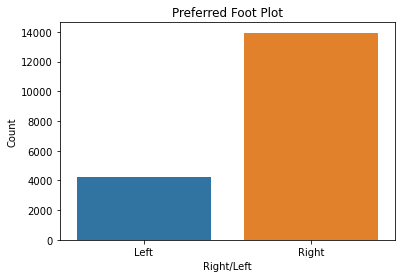

<Figure size 504x360 with 0 Axes>

In [28]:
# The distribution of preferred foot
sns.countplot(data=df, x="Preferred Foot")
plt.title("Preferred Foot Plot")
plt.xlabel("Right/Left")
plt.ylabel("Count")
plt.figure(figsize=(7,5))
plt.show()


In [35]:
# Mean age of players
mean_age = pd.DataFrame(df.groupby(['Age'])['Overall'].mean()) 
mean_age

,Overall
Age,
16,54.452381
17,56.365854
18,57.741803
19,59.575906
20,61.858529
21,63.482759
22,65.005243
23,66.254327
24,67.318081


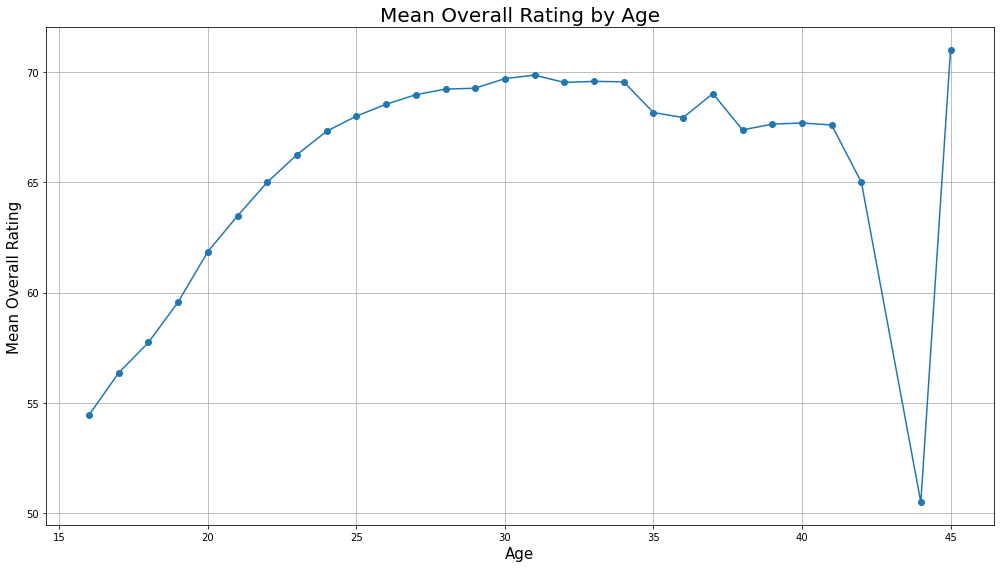

In [40]:
mean_age = df.groupby('Age')['Overall'].mean().reset_index()

plt.figure(figsize=(14, 8))
plt.plot(mean_age['Age'], mean_age['Overall'], marker='o', linestyle='-')
plt.title('Mean Overall Rating by Age', fontsize=20)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Mean Overall Rating', fontsize=15)
plt.grid(True)
plt.tight_layout()
plt.show()


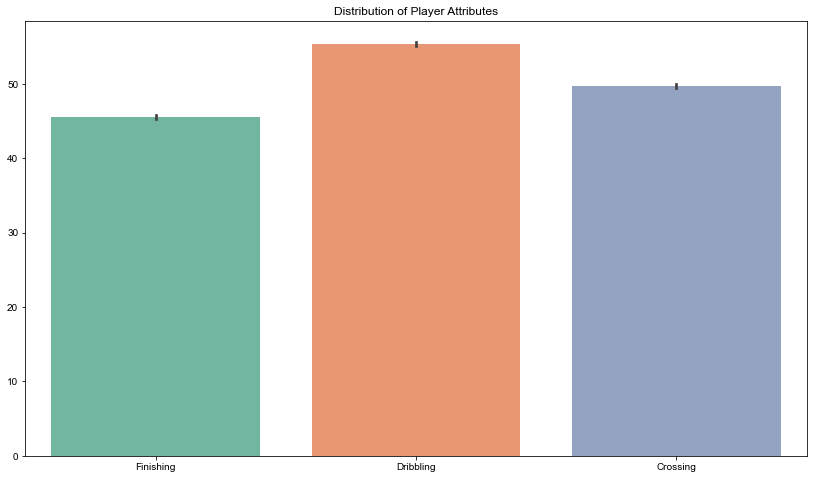

In [48]:
attributes_to_analyze = ['Finishing', 'Dribbling', 'Crossing']

plt.figure(figsize=(14, 8))
sns.barplot(data=df[attributes_to_analyze], palette='Set2')
sns.set_style("whitegrid")
plt.title('Distribution of Player Attributes')
plt.show()

In [51]:
numerical = [ cat for cat in df.columns if df[cat].dtypes !='O']
#print('List of numerical variables {}'.format(numerical))
numerical

['ID',
 'Age',
 'Overall',
 'Potential',
 'Special',
 'International Reputation',
 'Weak Foot',
 'Skill Moves',
 'Crossing',
 'Finishing',
 'HeadingAccuracy',
 'ShortPassing',
 'Volleys',
 'Dribbling',
 'Curve',
 'FKAccuracy',
 'LongPassing',
 'BallControl',
 'Acceleration',
 'SprintSpeed',
 'Agility',
 'Reactions',
 'Balance',
 'ShotPower',
 'Jumping',
 'Stamina',
 'Strength',
 'LongShots',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Marking',
 'StandingTackle',
 'SlidingTackle',
 'GKDiving',
 'GKHandling',
 'GKKicking',
 'GKPositioning',
 'GKReflexes']

In [57]:
numerical_data = ['Age','Overall','Potential','International Reputation','Weak Foot','Skill Moves','Crossing','Finishing',
 'HeadingAccuracy','Volleys','Dribbling','BallControl','Acceleration','SprintSpeed','ShotPower','Strength','Vision']


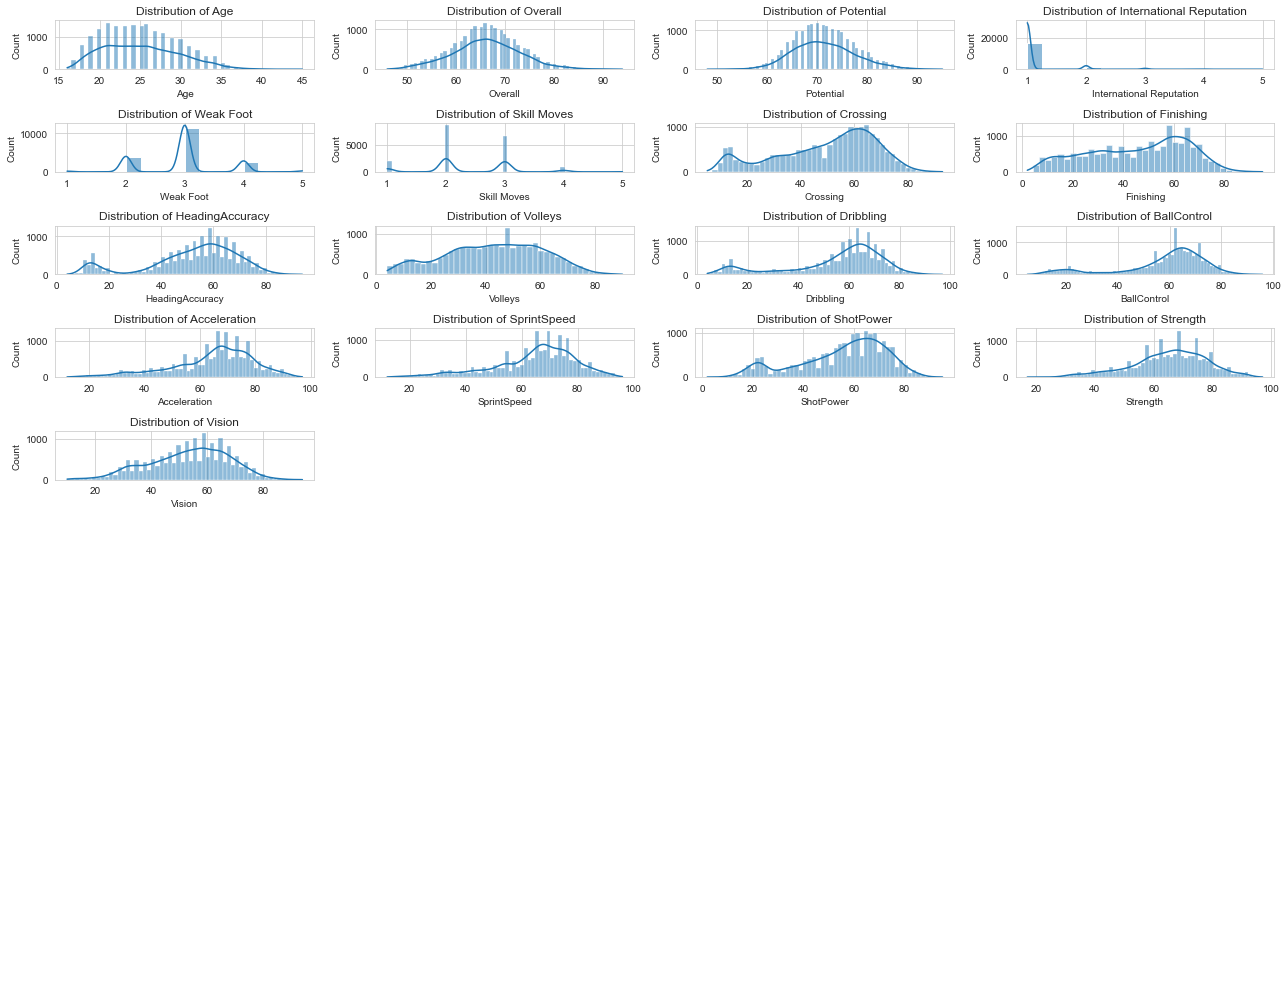

In [61]:
# Define the number of rows and columns for subplots
rows = 10  # Number of rows for subplots
cols = 4  # Number of columns for subplots

fig, axes = plt.subplots(rows, cols, figsize=(18, 14))
axes = axes.ravel()  # Flatten the 2D array of subplots into a 1D array

for i, column in enumerate(numerical_data):
    sns.histplot(df[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')

for i in range(len(numerical_data), rows * cols):
    axes[i].axis('off')

plt.tight_layout()
plt.show()    

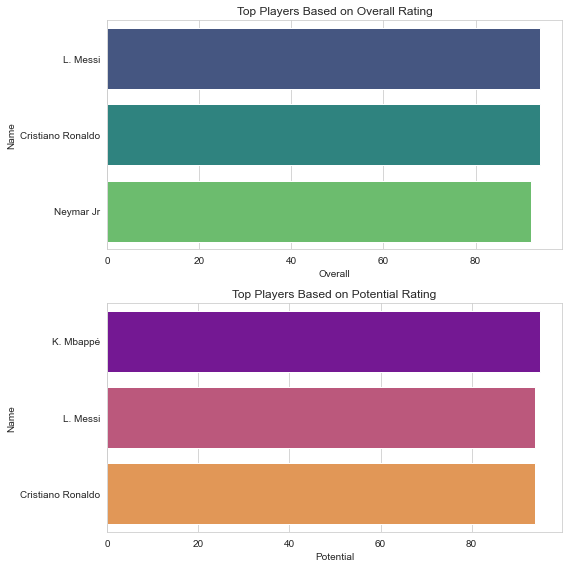

In [64]:
top_players_overall = df.nlargest(3, 'Overall')  # Adjust the number of top players as needed
top_players_potential = df.nlargest(3, 'Potential')

# Plot Overall and Potential ratings
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))

sns.barplot(x='Overall', y='Name', data=top_players_overall, ax=axes[0], palette='viridis')
axes[0].set_title('Top Players Based on Overall Rating')

sns.barplot(x='Potential', y='Name', data=top_players_potential, ax=axes[1], palette='plasma')
axes[1].set_title('Top Players Based on Potential Rating')

plt.tight_layout()
plt.show()